In [5]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [6]:
df=pd.read_csv('../data/raw/Formula1data.csv')
df

,Unnamed: 0,raceId,driverId,startingPosition,racePosition,year,raceIdOrdered,yearStarted,driverExpRaces,qualiResultPosition,nationality,number,forename,surname,q1Msec,q2Msec,q3Msec,maxPace,meanPace,driverExpYears
0,0,224,21,16,14,1996,582,1996,1,16.0,Italian,0,Giancarlo,Fisichella,95898,0,0,95898,95898.000000,0
1,3,224,65,14,20,1996,582,1989,84,14.0,British,0,Johnny,Herbert,95453,0,0,95453,95453.000000,7
2,4,224,84,19,19,1996,582,1984,150,19.0,British,0,Martin,Brundle,96286,0,0,96286,96286.000000,12
3,5,224,55,6,18,1996,582,1989,104,6.0,French,0,Jean,Alesi,94257,0,0,94257,94257.000000,7
4,6,224,50,12,17,1996,582,1994,16,12.0,Dutch,0,Jos,Verstappen,95338,0,0,95338,95338.000000,2
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7585,7679,1096,20,9,10,2022,1079,2007,300,9.0,German,5,Sebastian,Vettel,85523,84974,84961,85523,85152.666667,15
7586,7680,1096,846,7,6,2022,1079,2019,82,7.0,British,4,Lando,Norris,85387,84903,84769,85387,85019.666667,3
7587,7681,1096,839,8,7,2022,1079,2016,111,8.0,French,31,Esteban,Ocon,85735,85007,84830,85735,85190.666667,6
7588,7682,1096,840,14,8,2022,1079,2017,122,14.0,Canadian,18,Lance,Stroll,85741,85359,0,85741,85550.000000,5


q1 = es la primer vuelta 
q2 = segunda vuelta
q3 = es la tercer vuelta
todo esto en milisegundos


In [7]:
df.drop(columns='Unnamed: 0',axis=1,inplace=True)

In [8]:
df

,raceId,driverId,startingPosition,racePosition,year,raceIdOrdered,yearStarted,driverExpRaces,qualiResultPosition,nationality,number,forename,surname,q1Msec,q2Msec,q3Msec,maxPace,meanPace,driverExpYears
0,224,21,16,14,1996,582,1996,1,16.0,Italian,0,Giancarlo,Fisichella,95898,0,0,95898,95898.000000,0
1,224,65,14,20,1996,582,1989,84,14.0,British,0,Johnny,Herbert,95453,0,0,95453,95453.000000,7
2,224,84,19,19,1996,582,1984,150,19.0,British,0,Martin,Brundle,96286,0,0,96286,96286.000000,12
3,224,55,6,18,1996,582,1989,104,6.0,French,0,Jean,Alesi,94257,0,0,94257,94257.000000,7
4,224,50,12,17,1996,582,1994,16,12.0,Dutch,0,Jos,Verstappen,95338,0,0,95338,95338.000000,2
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7585,1096,20,9,10,2022,1079,2007,300,9.0,German,5,Sebastian,Vettel,85523,84974,84961,85523,85152.666667,15
7586,1096,846,7,6,2022,1079,2019,82,7.0,British,4,Lando,Norris,85387,84903,84769,85387,85019.666667,3
7587,1096,839,8,7,2022,1079,2016,111,8.0,French,31,Esteban,Ocon,85735,85007,84830,85735,85190.666667,6
7588,1096,840,14,8,2022,1079,2017,122,14.0,Canadian,18,Lance,Stroll,85741,85359,0,85741,85550.000000,5


# Analisis Exploratorio de Datos

In [9]:
df.select_dtypes(include='object')

,nationality,forename,surname
0,Italian,Giancarlo,Fisichella
1,British,Johnny,Herbert
2,British,Martin,Brundle
3,French,Jean,Alesi
4,Dutch,Jos,Verstappen
...,...,...,...
7585,German,Sebastian,Vettel
7586,British,Lando,Norris
7587,French,Esteban,Ocon
7588,Canadian,Lance,Stroll


Se tienen 3 columnas categóricas, las cuales representan su nacionalidad y el nombre del piloto

In [10]:
df.select_dtypes(exclude='object')

,raceId,driverId,startingPosition,racePosition,year,raceIdOrdered,yearStarted,driverExpRaces,qualiResultPosition,number,q1Msec,q2Msec,q3Msec,maxPace,meanPace,driverExpYears
0,224,21,16,14,1996,582,1996,1,16.0,0,95898,0,0,95898,95898.000000,0
1,224,65,14,20,1996,582,1989,84,14.0,0,95453,0,0,95453,95453.000000,7
2,224,84,19,19,1996,582,1984,150,19.0,0,96286,0,0,96286,96286.000000,12
3,224,55,6,18,1996,582,1989,104,6.0,0,94257,0,0,94257,94257.000000,7
4,224,50,12,17,1996,582,1994,16,12.0,0,95338,0,0,95338,95338.000000,2
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7585,1096,20,9,10,2022,1079,2007,300,9.0,5,85523,84974,84961,85523,85152.666667,15
7586,1096,846,7,6,2022,1079,2019,82,7.0,4,85387,84903,84769,85387,85019.666667,3
7587,1096,839,8,7,2022,1079,2016,111,8.0,31,85735,85007,84830,85735,85190.666667,6
7588,1096,840,14,8,2022,1079,2017,122,14.0,18,85741,85359,0,85741,85550.000000,5


In [11]:
df.select_dtypes(exclude='object').columns

Index(['raceId', 'driverId', 'startingPosition', 'racePosition', 'year',
       'raceIdOrdered', 'yearStarted', 'driverExpRaces', 'qualiResultPosition',
       'number', 'q1Msec', 'q2Msec', 'q3Msec', 'maxPace', 'meanPace',
       'driverExpYears'],
      dtype='object')

Las columnas numéricasen el dataset son:
'raceId', 'driverId', 'startingPosition', 'racePosition', 'year',
'raceIdOrdered', 'yearStarted', 'driverExpRaces', 'qualiResultPosition',
'q1Msec', 'q2Msec', 'q3Msec', 'maxPace', 'meanPace', 'driverExpYears'

## Buscando valores faltantes

In [12]:
df.isna().sum()

raceId                 0
driverId               0
startingPosition       0
racePosition           0
year                   0
raceIdOrdered          0
yearStarted            0
driverExpRaces         0
qualiResultPosition    0
nationality            0
number                 0
forename               0
surname                0
q1Msec                 0
q2Msec                 0
q3Msec                 0
maxPace                0
meanPace               0
driverExpYears         0
dtype: int64

Como se puede observar en la tabla anterior, no tenemos valores faltantes

## Obteniendo los histogramas de las varibles continuas

In [13]:
df

,raceId,driverId,startingPosition,racePosition,year,raceIdOrdered,yearStarted,driverExpRaces,qualiResultPosition,nationality,number,forename,surname,q1Msec,q2Msec,q3Msec,maxPace,meanPace,driverExpYears
0,224,21,16,14,1996,582,1996,1,16.0,Italian,0,Giancarlo,Fisichella,95898,0,0,95898,95898.000000,0
1,224,65,14,20,1996,582,1989,84,14.0,British,0,Johnny,Herbert,95453,0,0,95453,95453.000000,7
2,224,84,19,19,1996,582,1984,150,19.0,British,0,Martin,Brundle,96286,0,0,96286,96286.000000,12
3,224,55,6,18,1996,582,1989,104,6.0,French,0,Jean,Alesi,94257,0,0,94257,94257.000000,7
4,224,50,12,17,1996,582,1994,16,12.0,Dutch,0,Jos,Verstappen,95338,0,0,95338,95338.000000,2
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7585,1096,20,9,10,2022,1079,2007,300,9.0,German,5,Sebastian,Vettel,85523,84974,84961,85523,85152.666667,15
7586,1096,846,7,6,2022,1079,2019,82,7.0,British,4,Lando,Norris,85387,84903,84769,85387,85019.666667,3
7587,1096,839,8,7,2022,1079,2016,111,8.0,French,31,Esteban,Ocon,85735,85007,84830,85735,85190.666667,6
7588,1096,840,14,8,2022,1079,2017,122,14.0,Canadian,18,Lance,Stroll,85741,85359,0,85741,85550.000000,5


driverId corresponde al Id del piloto

In [14]:
# investigar como obtener cual es la nacionalidad que contiene más pilotos en la f1

In [15]:
df['nationality'].value_counts()   #investigando cual es la nacionalidad que tiene más pilotos

nationality
German           1274
British          1035
Finnish           636
French            611
Spanish           564
Brazilian         543
Italian           388
Australian        376
Mexican           288
Japanese          258
Dutch             233
Canadian          221
Russian           211
Danish            151
Monegasque        103
Polish             96
Swedish            95
Venezuelan         92
Austrian           65
Belgian            62
Thai               56
Swiss              55
Indian             36
American           31
Portuguese         24
New Zealander      23
Chinese            21
Argentine          13
Colombian          13
Indonesian         12
Malaysian           3
Czech               1
Name: count, dtype: int64

<Axes: >

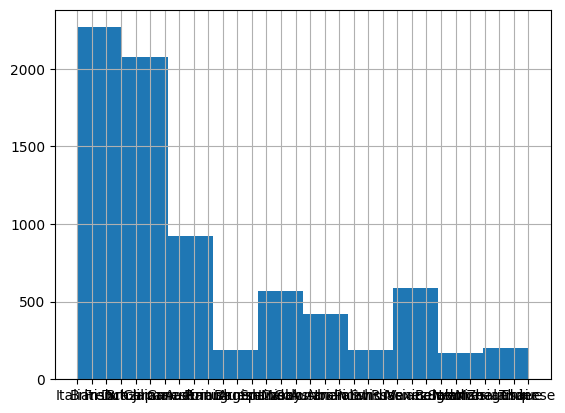

In [16]:
df['nationality'].hist()    #buscar como graficar los 10 primeras nacionalidades de los pilotos

la nacionalidad que han corrido más veces en formula 1 más veces es Alemania, seguido de Inglaterra.

<Axes: >

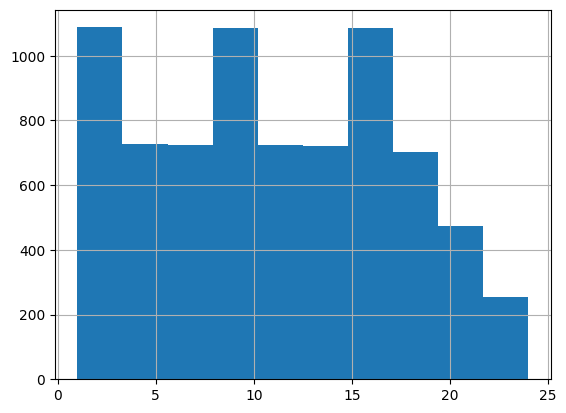

In [17]:
df['startingPosition'].hist()

In [18]:
df['startingPosition'].skew()

0.06555682215522332

In [19]:
df['startingPosition'].describe()

count    7590.000000
mean       11.039921
std         6.159890
min         1.000000
25%         6.000000
50%        11.000000
75%        16.000000
max        24.000000
Name: startingPosition, dtype: float64

<Axes: >

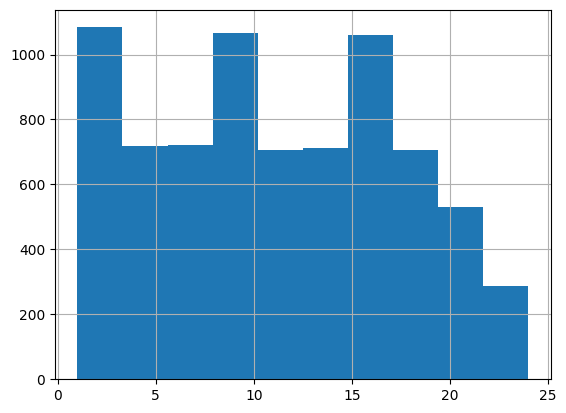

In [20]:
df['racePosition'].hist()

Startin Position representa la posición en la que el piloto empieza la carrera, tomando los valores dadas las posiciones del 1 al 24.

In [21]:
df['racePosition'].describe()

count    7590.000000
mean       11.150725
std         6.239326
min         1.000000
25%         6.000000
50%        11.000000
75%        16.000000
max        24.000000
Name: racePosition, dtype: float64

Esta columna representa la posición en la que el piloto terminó la carrera.

<Axes: >

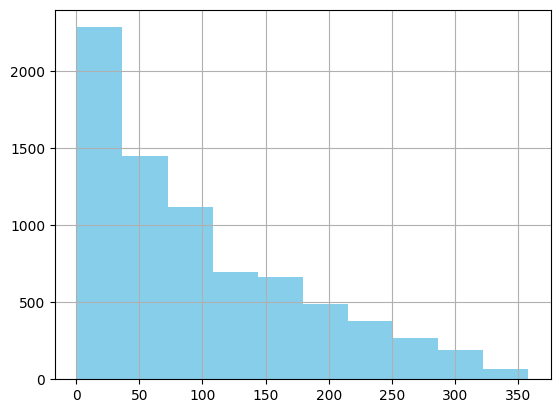

In [22]:
df['driverExpRaces'].hist(color='skyblue')

In [23]:
df['driverExpRaces'].describe()

count    7590.000000
mean       98.177207
std        83.364860
min         1.000000
25%        30.000000
50%        74.000000
75%       152.000000
max       358.000000
Name: driverExpRaces, dtype: float64

In [24]:
df_experience=df.groupby(by=['year','forename'])['driverExpRaces'].max()

In [25]:
df_experience

year  forename 
1996  Andrea        24
      Damon         64
      David         32
      Eddie         39
      Gerhard      187
                  ... 
2022  Pierre       108
      Sebastian    300
      Sergio       237
      Valtteri     201
      Yuki          44
Name: driverExpRaces, Length: 547, dtype: int64

In [26]:
df_experience=df_experience.reset_index()

In [27]:
df_experience

,year,forename,driverExpRaces
0,1996,Andrea,24
1,1996,Damon,64
2,1996,David,32
3,1996,Eddie,39
4,1996,Gerhard,187
...,...,...,...
542,2022,Pierre,108
543,2022,Sebastian,300
544,2022,Sergio,237
545,2022,Valtteri,201


In [28]:
df_experience[df_experience['year']==2022].sort_values('driverExpRaces')

,year,forename,driverExpRaces
541,2022,Nyck,1
532,2022,Guanyu,22
546,2022,Yuki,44
538,2022,Mick,44
525,2022,Alexander,59
539,2022,Nicholas,61
535,2022,Lando,82
531,2022,George,82
527,2022,Charles,103
542,2022,Pierre,108


Para el año 2022 el piloto con mayor carreras es Fernando Alonso y el piloto con menor carreras es Nyck.

In [29]:
maxpace_all_drivers=df['maxPace'].min()

In [30]:
df[df['maxPace']==maxpace_all_drivers]

,raceId,driverId,startingPosition,racePosition,year,raceIdOrdered,yearStarted,driverExpRaces,qualiResultPosition,nationality,number,forename,surname,q1Msec,q2Msec,q3Msec,maxPace,meanPace,driverExpYears
6722,1046,822,1,8,2020,1034,2013,156,1.0,Finnish,77,Valtteri,Bottas,53904,53803,53377,53904,53694.666667,7


El piloto que hizo la vuelta más rápida de qualy fue Valterri Bottas en 2020

In [31]:
max_drivers_years=df['driverExpYears'].max()

In [32]:
df['driverExpYears'].describe()

count    7590.000000
mean        5.525560
std         4.915099
min         0.000000
25%         1.000000
50%         4.000000
75%         9.000000
max        21.000000
Name: driverExpYears, dtype: float64

In [33]:
df[df['driverExpYears']==max_drivers_years]

,raceId,driverId,startingPosition,racePosition,year,raceIdOrdered,yearStarted,driverExpRaces,qualiResultPosition,nationality,number,forename,surname,q1Msec,q2Msec,q3Msec,maxPace,meanPace,driverExpYears
3093,860,30,4,20,2012,859,1991,289,4.0,German,0,Michael,Schumacher,86586,85571,85336,86586,85831.000000,21
3131,861,30,3,10,2012,860,1991,290,3.0,German,0,Michael,Schumacher,97517,97017,96391,97517,96975.000000,21
3143,862,30,2,24,2012,861,1991,291,3.0,German,0,Michael,Schumacher,96797,95794,95691,96797,96094.000000,21
3179,863,30,22,10,2012,862,1991,292,18.0,German,0,Michael,Schumacher,94865,0,0,94865,94865.000000,21
3186,864,30,8,24,2012,863,1991,293,9.0,German,0,Michael,Schumacher,83757,82904,0,83757,83330.500000,21
3209,865,30,6,19,2012,864,1991,294,1.0,German,0,Michael,Schumacher,75873,75062,74301,75873,75078.666667,21
3235,866,30,9,22,2012,865,1991,295,9.0,German,0,Michael,Schumacher,74892,74480,74812,74892,74728.000000,21
3271,867,30,12,3,2012,866,1991,296,12.0,German,0,Michael,Schumacher,99447,98770,0,99447,99108.500000,21
3302,868,30,3,7,2012,867,1991,297,3.0,German,0,Michael,Schumacher,106571,115799,112020,115799,111463.333333,21
3319,869,30,3,7,2012,868,1991,298,4.0,German,0,Michael,Schumacher,76686,98010,102459,102459,92385.000000,21


o	El piloto que más activo estuvo en Fórmula 1 fue Michael Schumaher con 21 años de estar ahí, después de el está Fernando Alonso, el cual es el que sigue corriendo en Fórmula 1.

## Tomando como ejemplo al piloto Checo Pérez

In [34]:
mex_names=df[df['nationality']=='Mexican']['forename']

In [35]:
mex_names.value_counts()

forename
Sergio     230
Esteban     58
Name: count, dtype: int64

In [36]:
df_checo=df[df['number']==11]

In [37]:
df_checo['racePosition'].describe()

count    230.000000
mean       9.513043
std        5.261486
min        1.000000
25%        6.000000
50%        9.000000
75%       12.000000
max       24.000000
Name: racePosition, dtype: float64

In [38]:
df_checo['racePosition'].median()

9.0

In [39]:
df_checo['racePosition'].value_counts()

racePosition
7     26
11    21
9     18
10    18
8     17
6     16
5     14
4     13
3     12
2     10
17     8
12     8
20     7
15     7
13     6
16     5
18     4
22     4
14     4
1      4
19     3
21     3
24     2
Name: count, dtype: int64

<Axes: >

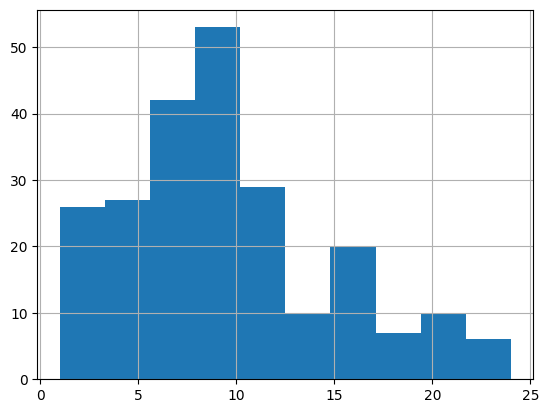

In [40]:
df_checo['racePosition'].hist()

Nos dimos cuenta que mediate estos datos estadísticos, Checo Perez a terminado en la novena posición.

In [41]:
df_checo[df_checo['racePosition']==1]['year']

6715    2020
6853    2021
7287    2022
7483    2022
Name: year, dtype: int64

Checo Perez a ganado en los años 2020, 2021 y dos veces en 2022

In [42]:
df_checo.groupby('year')['driverExpRaces'].max()

year
2011     18
2012     38
2013     57
2014     76
2015     95
2016    116
2017    136
2018    157
2019    178
2020    193
2021    215
2022    237
Name: driverExpRaces, dtype: int64

La estadística anterior podemos conlcuir que en su primer año en formula 1 corrió 18 veces y en el 2022 corrió 237

In [43]:
maxpace_checo=df_checo['maxPace'].min()

In [44]:
df_checo[df_checo['maxPace']==maxpace_checo]

,raceId,driverId,startingPosition,racePosition,year,raceIdOrdered,yearStarted,driverExpRaces,qualiResultPosition,nationality,number,forename,surname,q1Msec,q2Msec,q3Msec,maxPace,meanPace,driverExpYears
6715,1046,815,5,1,2020,1034,2011,192,5.0,Mexican,11,Sergio,Pérez,54236,53787,53790,54236,53937.666667,9


Checo hizo su vuelta más rápida en el 2020